In [2]:
# Functional imports
import os 
import numpy as np
import nibabel as nib
from nilearn import masking

from brainiak import image

import data_prep_helpers as helpers
from plotting_helpers import plot_surfaces_with_vmax

# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
%autosave 5

Autosaving every 5 seconds


In [3]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'Documents', 'Data')
print('Data location:', directory)

Data location: /Users/angira/Documents/Data


<h1>Generate mask</h1>

In [ ]:
# Load mask
group_mask = nib.load(os.path.join(directory, 'group_mask.nii.gz'))
print('Mask shape:', np.shape(group_mask))

In [4]:
# Load ISC results

isc_34yrs = np.squeeze(np.load(os.path.join(directory, '3-4-yrs', '3-4-yrs_isc_thresholded.npy')))
print('3-4 years ISC:', np.shape(isc_34yrs))

isc_5yrs = np.squeeze(np.load(os.path.join(directory, '5-yrs', '5-yrs_isc_thresholded.npy')))
print('5 years ISC:', np.shape(isc_5yrs))

isc_7yrs = np.squeeze(np.load(os.path.join(directory, '7-yrs', '7-yrs_isc_thresholded.npy')))
print('7 years ISC:', np.shape(isc_7yrs))

isc_812yrs = np.squeeze(np.load(os.path.join(directory, '8-12-yrs', '8-12-yrs_isc_thresholded.npy')))
print('8-12 years ISC:', np.shape(isc_812yrs))

isc_adults = np.squeeze(np.load(os.path.join(directory, 'adults', 'adults_isc_thresholded.npy')))
print('adults years ISC:', np.shape(isc_adults))


3-4 years ISC: (377996,)
5 years ISC: (377996,)
7 years ISC: (377996,)
8-12 years ISC: (377996,)
adults years ISC: (377996,)


In [5]:
# Convert to 0s and 1s
isc_masks = [helpers.make_vol((1*(isc_34yrs > 0)), group_mask),
             helpers.make_vol((1*(isc_5yrs > 0)), group_mask),
             helpers.make_vol((1*(isc_7yrs > 0)), group_mask),
             helpers.make_vol((1*(isc_812yrs > 0)), group_mask),
             helpers.make_vol((1*(isc_adults > 0)), group_mask)]

# Intersect mask
isc_int_mask = masking.intersect_masks(isc_masks, threshold=1)
print('Intersected mask:', np.shape(isc_int_mask))


Intersected mask: (79, 95, 68)


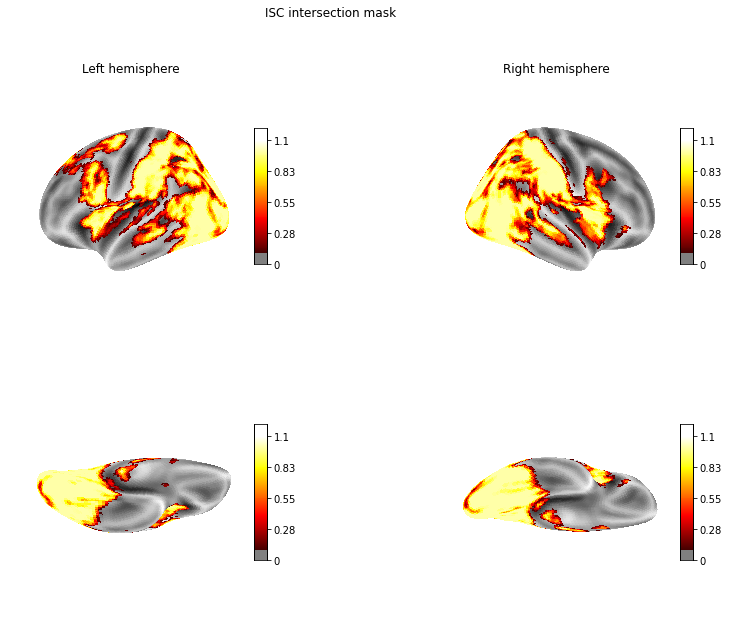

In [6]:
# Plot mask
plot_surfaces_with_vmax(vol=isc_int_mask, title='ISC intersection mask', vis_threshold=0.1, vmax=1.1)

In [7]:
# Save mask
isc_int_mask.to_filename(os.path.join(os.path.expanduser('~'), 'Documents', 'Data', 'isc_int_mask.nii.gz'))
print('Saved successfully')

Saved successfully


<h1>Mask data</h1>

In [4]:
# Load mask
isc_int_mask = nib.load(os.path.join(directory, 'isc_int_mask.nii.gz'))
print('Mask shape:', np.shape(isc_int_mask))

Mask shape: (79, 95, 68)


In [6]:
# 3-4- year olds
normalized_bold_34yrs = helpers.mask_trim_normalize(os.path.join(directory, '3-4-yrs', 'raw_subjects'), 
                                                    subject_ids=range(1,32), 
                                                    mask=isc_int_mask)

print('Normalized data for 3-4 year olds', np.shape(normalized_bold_34yrs))

np.save(os.path.join(directory, '3-4-yrs', '3-4-yrs_normalized_data_isc_int_mask.npy'), normalized_bold_34yrs)
print('Saved 3-4 year old data')

Normalized data for 3-4 year olds (31, 63298, 152)
Saved 3-4 year old data


In [7]:
# 5 year olds
normalized_bold_5yrs = helpers.mask_trim_normalize(os.path.join(directory, '5-yrs', 'raw_subjects'), 
                                                   subject_ids=range(32,63), 
                                                   mask=isc_int_mask)

print('Normalized data for 5 year olds', np.shape(normalized_bold_5yrs))

np.save(os.path.join(directory, '5-yrs', '5-yrs_normalized_data_isc_int_mask.npy'), normalized_bold_5yrs)
print('Saved 5 year old data')


Normalized data for 5 year olds (31, 63298, 152)
Saved 5 year old data


In [5]:
# 7 year olds
ids_7yrs = [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 83, 84, 86, 88, 96, 99, 114, 116, 122]

normalized_bold_7yrs = helpers.mask_trim_normalize(os.path.join(directory, '7-yrs', 'raw_subjects'), 
                                                   subject_ids=ids_7yrs, 
                                                   mask=isc_int_mask)

print('Normalized data for 7 year olds', np.shape(normalized_bold_7yrs))

np.save(os.path.join(directory, '7-yrs', '7-yrs_normalized_data_isc_int_mask.npy'), normalized_bold_7yrs)
print('Saved 7 year old data')

Normalized data for 7 year olds (23, 63298, 152)
Saved 7 year old data


In [6]:
# 8-12 year olds
ids_812yrs = [77, 78, 82, 85, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 101, 102, 103, 
               104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117, 118, 119, 120, 121]

normalized_bold_812yrs = helpers.mask_trim_normalize(os.path.join(directory, '8-12-yrs', 'raw_subjects'), 
                                                     subject_ids=ids_812yrs, 
                                                     mask=isc_int_mask)

print('Normalized data for 8-12 year olds', np.shape(normalized_bold_812yrs))

np.save(os.path.join(directory, '8-12-yrs', '8-12-yrs_normalized_data_isc_int_mask.npy'), normalized_bold_812yrs)
print('Saved 8-12 year old data')

Normalized data for 8-12 year olds (34, 63298, 152)
Saved 8-12 year old data


In [5]:
# Adults
normalized_bold_adults = helpers.mask_trim_normalize(os.path.join(directory, 'adults', 'raw_subjects'), 
                                                     subject_ids=range(123,156), 
                                                     mask=isc_int_mask)

print('Normalized data for adults', np.shape(normalized_bold_adults))
np.save(os.path.join(directory, 'adults', 'adults_normalized_data_isc_int_mask.npy'), normalized_bold_adults)
print('Saved adult data')

Normalized data for adults (33, 63298, 152)
Saved adult data
